In [1]:
import pandas
import numpy 
import hypertools as hyp
import seaborn as sns                
#I imported seaborn when I was trying to use a grouped bar plot. However, I decided not to use this method in the end. 

%matplotlib inline                  
#I integrated this line because my graphics were not loading even after the code ran. This was discussed as a solution in slack.

In [2]:
excel_file = 'justicesdata.xlsx'

#DataSource : http://epstein.wustl.edu/research/justicesdata.html

justices_data = pandas.read_excel(excel_file)

#Source: I was having trouble uploading and opening my data and used this site for help https://www.dataquest.io/blog/excel-and-pandas/

justices_data.head()               #Shows original format of data. 

,name,yrnom,posit,recess,success,id,analu,seatid,spaethid,zukid,...,dateserb,datesere,agedep,reasdep,postdep,scssr,deathd,deathcit,deathst,deathag
0,"Jay, John",1789,0,0,1,1,1,1.01,1,888,...,10/19/1789,06/29/1795,49,10,3,"Ellsworth, Oliver",05/17/1829,270,32,83
1,"Rutledge, John",1789,1,0,1,2,1,2.01,2,888,...,02/15/1790,03/05/1791,51,10,6,"Johnson, Thomas",07/18/1800,349,40,60
2,"Cushing, William",1789,1,0,1,3,1,3.01,3,888,...,02/02/1790,09/13/1810,78,3,777,"Story, Joseph",09/13/1810,190,21,78
3,"Harrison, Robert H.",1789,1,0,0,4,1,6.01,888,888,...,888. NOT CONFIRMED OR DIDN'T SERVE,888. NOMINEE NOT CONFIRMED OR DIDN'T SERVE,888,888,888,888. NOMINEE NOT CONFIRMED OR DIDN'T SERVE,04/02/1790,164,20,45
4,"Wilson, James",1789,1,0,1,5,1,4.01,4,888,...,10/05/1789,08/21/1798,55,3,777,"Washington, Bushrod",08/21/1798,298,33,55


In [3]:
#DataCleaning
#DataCleaning
#justices_data.set_index('name', inplace=True)
#I orginially wanted to set the index as the justice's name. However, once I got to the graphic part of the assignment, I realized it would be better to have a number assigned to each of the justices.

names = {'name': 'Name', 'yrnom': 'Nomination Year', 'success':'Chief'}
justices_data.rename(names,inplace=True, axis=1)
justices_data.drop(['posit', 'recess', 'id', 'analu', 'seatid',
       'spaethid', 'zukid', 'birdate', 'birthcit', 'birthst',
       'childcit', 'childst', 'childsur', 'famses', 'famjud', 'nomrelig',
       'natorig', 'mothname', 'fathname', 'fathoccu',
       'fathpol', 'fathpoln', 'undsta', 'unddat', 'undschn',
       'gradsch', 'gradsta', 'graddat', 'gradschn',  'lawsta',
       'lawdat', 'lawschn', 'read', 'readst', 'readyr', 'readn', 'marryn',
       'spouse', 'marryr', 'child', 'militbr', 'milityr1', 'milityr2',
       'militran', 'militwar', 'clerkj', 'clerkyr1', 'clerkyr2', 'barst1',
       'baryr1', 'barst2', 'baryr2', 'barst3', 'baryr3', 'privtyp1',
       'privst1', 'privyrf1', 'privyrl1', 'privtyp2', 'privst2',
       'privyrf2', 'privyrl2', 'schname1', 'schrank1', 'schyrf1',
       'schyrl1', 'schname2', 'schrank2', 'schyrf2', 'schyrl2', 'schn',
       'schcon', 'sttrist', 'sttriyr1', 'sttriyr2', 'stapst', 'stapyr1',
       'stapyr2', 'stsupst', 'stsupyr1', 'stsupyr2', 'feddist', 'feddi',
       'feddiyr1', 'feddiyr2', 'fedca', 'fedcayr1', 'fedcayr2', 'usasat',
       'usasat1', 'usasat2', 'usat', 'usat1', 'usat2', 'ussgo1', 'ussgo2',
       'ussg1', 'ussg2', 'usago1', 'usago2', 'usag1', 'usag2', 'uscab',
       'uscab1', 'uscab2', 'ussec', 'ussec1', 'ussec2', 'usage', 'usage1',
       'usage2', 'usagh', 'usagh1', 'usagh2', 'uspres1', 'uspres2',
       'ushr1', 'ushryrf1', 'ushryrl1', 'ushr2', 'ushryrf2', 'ushryrl2',
       'ussn1', 'ussnyrf1', 'ussnyrl1', 'ussn2', 'ussnyrf2', 'ussnyrl2',
       'conconv', 'concong', 'concong1', 'concong2', 'artcon', 'artcon1',
       'artcon2', 'artconsp', 'citat', 'citat1', 'citat2', 'cdep',
       'cdep1', 'cdep2', 'cdis', 'cdis1', 'cdis2', 'saag', 'saag1',
       'saag2', 'stag', 'stag1', 'stag2', 'ltgov', 'ltgov1', 'ltgov2',
       'gov', 'gov1', 'gov2', 'stcab', 'stcab1', 'stcab2', 'mayor',
       'mayor1', 'mayor2', 'stsenate', 'stsen1', 'stsen2', 'sthouse',
       'sthse1', 'sthse2', 'ctycl', 'ctycl1', 'ctycl2', 'commsn',
       'commsn1', 'commsn2', 'datenom', 'datesen', 'judnom', 'usjnom',
       'stjnom', 'prsznom', 'prstnom', 'prposnom', 'prschnom', 'govatnom',
       'uslenom', 'uslesnom', 'stlenom', 'stlesnom', 'stexpnom',
       'stexsnom', 'usexnom', 'yrposnom', 'agenom', 'stnom', 'parnom',
       'prparnom', 'prdssr', 'presname', 'prespart', 'nompres', 'socpres',
       'econpres', 'congress', 'senparty', 'nomsen', 'ideo', 'mednmq1',
       'medmq1', 'mednmq2', 'medmq2', 'qual', 'abarate', 'abavote',
       'heardate', 'heardays', 'comdvote', 'comvote', 'intpro', 'intanti',
       'sendate', 'senact', 'sensupp', 'senopp', 'serve', 'withdraw',
       'dateserb', 'datesere', 'agedep', 'reasdep', 'postdep', 'scssr',
       'deathd', 'deathcit', 'deathst', 'deathag'],inplace=True,axis=1)


# Data Cleaning 
To remove nonnumerical values, I removed the names from the data set. I kept the index automatically assigned to the data frame, in order to assign a number to each justice. I removed a lot of columns that I was not as interested in to simplify the data frame. I did not use "fill_na" because I did not have any nan values in my data set. 

In [4]:
justices_data.head()

,Name,Nomination Year,Chief,biryear,race,gender,undsch,lawsch
0,"Jay, John",1789,1,1745,0,0,24,888
1,"Rutledge, John",1789,1,1739,0,0,888,70
2,"Cushing, William",1789,1,1732,0,0,47,888
3,"Harrison, Robert H.",1789,0,1745,0,0,888,888
4,"Wilson, James",1789,1,1742,0,0,89,888


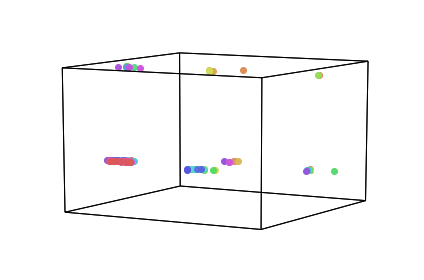

In [5]:
hyp.plot(justices_data, 'o', hue=numpy.array(justices_data.index))

In [6]:
numpy.array(justices_data.columns)
justices_data.values

array([['Jay, John', 1789, 1, ..., 0, 24, 888],
       ['Rutledge, John', 1789, 1, ..., 0, 888, 70],
       ['Cushing, William', 1789, 1, ..., 0, 47, 888],
       ...,
       ['Garland, Merrick Brian', 2016, 0, ..., 0, 47, 47],
       ['Gorsuch, Neil McGill', 2017, 1, ..., 0, 24, 47],
       ['Kavanaugh, Brett Michael', 2018, 1, ..., 0, 117, 117]],
      dtype=object)

In [7]:
justices_data.describe()

,Nomination Year,Chief,biryear,race,gender,undsch,lawsch
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,1889.903409,66.261364,1836.488636,0.022727,0.028409,217.170455,430.403409
std,65.048525,232.728536,63.693910,0.183756,0.166613,320.525006,415.590955
min,1789.000000,0.000000,1732.000000,0.000000,0.000000,3.000000,1.000000
25%,1840.000000,0.000000,1787.500000,0.000000,0.000000,47.000000,47.000000
50%,1884.500000,1.000000,1830.500000,0.000000,0.000000,85.000000,117.000000
75%,1943.500000,1.000000,1890.250000,0.000000,0.000000,117.000000,888.000000
max,2018.000000,888.000000,1967.000000,2.000000,1.000000,999.000000,999.000000


# Findings
I created a hyperplot of the 7 traits I selected across all of the past and present supreme court justices. I am unsure if this hyperplot displays any meaningful information about the justices. 

# Problems
I predicted that historically, judges have had very similar qualities. I anticipated seeing large clusters of judges on the hyperplot. I am not sure what actually happened. I think that I did not integrate time correctly. Instead of looking at how the various traits have changed over time, I integrated time (Nomination Year) as one of the variables. To try to get myself unstuck, I reviewed the Data Visualization notebook several times and tried to capture the data in different ways. I also tried using a bar graph and scatter plot, but felt like the hypertools format made more sense. I would estimate I spent about thirty minutes on this component of the project. 